In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
nan_counts = df.isna().sum()
print(nan_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
## Data transformation
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

imputer_age = SimpleImputer(strategy = 'median')
df['Age'] = imputer_age.fit_transform(df[['Age']])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns = ['Embarked'], drop_first = True, dtype = int)

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,2,0,1
1,1,1,1,38.0,1,0,71.2833,2,0,0
2,1,3,1,26.0,0,0,7.9250,1,0,1
3,1,1,1,35.0,1,0,53.1000,2,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,1


In [19]:
nan_counts = df.isna().sum()
print(nan_counts)

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
Embarked_Q    0
Embarked_S    0
dtype: int64


<Axes: >

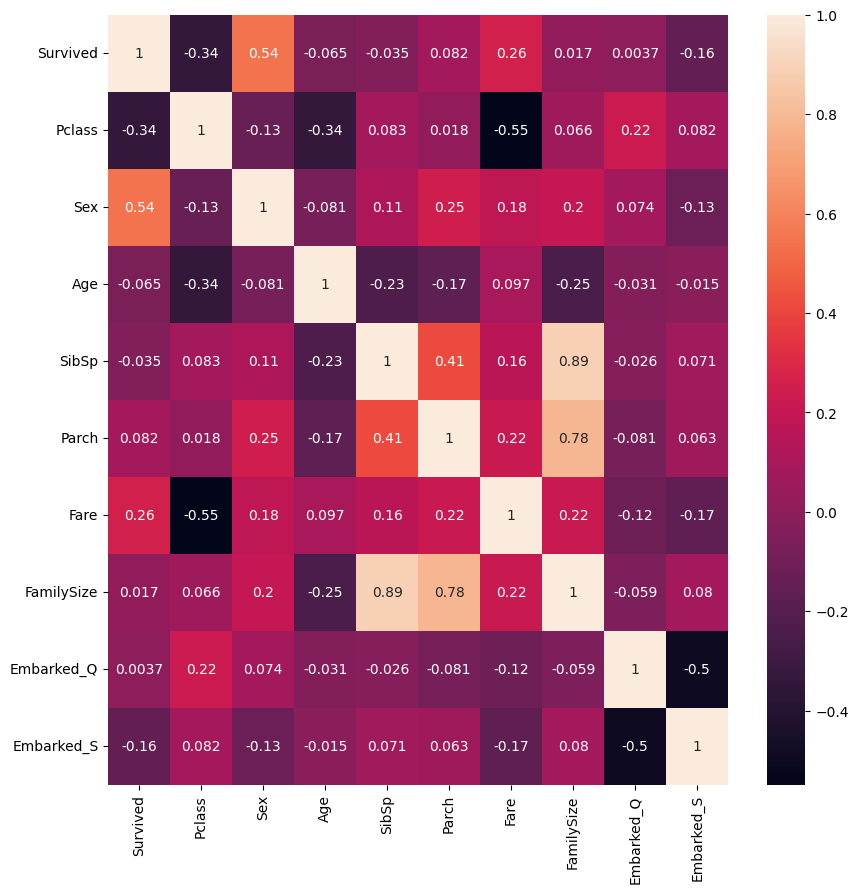

In [20]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [21]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
## Log Reg
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       115
           1       0.66      0.59      0.62        64

    accuracy                           0.74       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.74      0.74      0.74       179

Accuracy: 0.7430


In [31]:
## Decision Tree
dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       115
           1       0.65      0.66      0.65        64

    accuracy                           0.75       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179

Accuracy: 0.7486


In [33]:
## Random Forest
rand_for = RandomForestClassifier()

rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       115
           1       0.75      0.66      0.70        64

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7989


In [35]:
## XGBoost
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       115
           1       0.69      0.64      0.67        64

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179

Accuracy: 0.7709


In [36]:
## Tune Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

rand_for_tuned = RandomForestClassifier()
grid_search = GridSearchCV(rand_for_tuned, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
## Tuned Random Forest
rand_for = RandomForestClassifier(max_depth = 8, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       115
           1       0.79      0.64      0.71        64

    accuracy                           0.81       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.81      0.81      0.80       179

Accuracy: 0.8101


In [48]:
## Predict results
df_pred = pd.read_csv('data/test.csv')

In [49]:
## Data transformation
df_pred['FamilySize'] = df_pred['SibSp'] + df_pred['Parch'] + 1

imputer_age = SimpleImputer(strategy = 'median')
df_pred['Age'] = imputer_age.fit_transform(df_pred[['Age']])

df_pred['Sex'] = df_pred['Sex'].map({'male': 0, 'female': 1})
df_pred = pd.get_dummies(df_pred, columns = ['Embarked'], drop_first = True, dtype = int)

df_pred.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [50]:
df_pred.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,1,1,0
1,893,3,1,47.0,1,0,7.0000,2,0,1
2,894,2,0,62.0,0,0,9.6875,1,1,0
3,895,3,0,27.0,0,0,8.6625,1,0,1
4,896,3,1,22.0,1,1,12.2875,3,0,1


In [51]:
nan_counts = df_pred.isna().sum()
print(nan_counts)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
FamilySize     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [52]:
df_pred['Fare'].fillna((df_pred['Fare'].mean()), inplace=True)

In [53]:
X = df_pred[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S']]
df_pred['Survived'] = rand_for.predict(X)

In [54]:
df_pred

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S,Survived
0,892,3,0,34.5,0,0,7.8292,1,1,0,0
1,893,3,1,47.0,1,0,7.0000,2,0,1,0
2,894,2,0,62.0,0,0,9.6875,1,1,0,0
3,895,3,0,27.0,0,0,8.6625,1,0,1,0
4,896,3,1,22.0,1,1,12.2875,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,1,0,1,0
414,1306,1,1,39.0,0,0,108.9000,1,0,0,1
415,1307,3,0,38.5,0,0,7.2500,1,0,1,0
416,1308,3,0,27.0,0,0,8.0500,1,0,1,0


In [55]:
df_pred.Survived.value_counts()

Survived
0    272
1    146
Name: count, dtype: int64

In [56]:
df_pred = df_pred[['PassengerId', 'Survived']]

In [57]:
df_pred.to_csv('results.csv', index = False)

In [58]:
## Final score on Kaggle Competition 0.77033